<a href="https://colab.research.google.com/github/jtinklerdav/jtinklerdav.github.io/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Similarites between the 9 countries

In this code I apply supervised machine learning to calculate the similarites of the 9 selected countries in my project. This will allow me to consider whether new world and old world wine producers act similarly as well as conssider emerging markets too.


# Scraping the Dataset

In [1]:
import pandas as pd
import requests

In [6]:
tempdf = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_average_yearly_temperature')
tempdf

[              Country Average yearly temperature (1961–1990 Celsius)
 0        Burkina Faso                                          28.29
 1                Mali                                          28.25
 2            Kiribati                                          28.20
 3            Djibouti                                          28.00
 4            Maldives                                          28.00
 ..                ...                                            ...
 187   Norway [note 1]                                          01.50
 188           Iceland                                          −0.70
 189  Denmark [note 2]                                          −3.70
 190            Canada                                          −5.10
 191            Russia                                          −5.35
 
 [192 rows x 2 columns]]

In [7]:
len(tempdf)

1

In [9]:
tempdf2 = tempdf[0]

In [10]:
tempdf3 = tempdf2.rename(columns={'Average yearly temperature (1961–1990 Celsius)':'AvgTemp'})
tempdf3

,Country,AvgTemp
0,Burkina Faso,28.29
1,Mali,28.25
2,Kiribati,28.20
3,Djibouti,28.00
4,Maldives,28.00
...,...,...
187,Norway [note 1],01.50
188,Iceland,−0.70
189,Denmark [note 2],−3.70
190,Canada,−5.10


In [14]:
raindf = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_average_annual_precipitation')
raindf

[     Rank                Country  \
 0       1               Colombia   
 1       2  São Tomé and Príncipe   
 2       3       Papua New Guinea   
 3       4        Solomon Islands   
 4       5                 Panama   
 ..    ...                    ...   
 177   178   United Arab Emirates   
 178   179                  Qatar   
 179   180           Saudi Arabia   
 180   181                  Libya   
 181   182                  Egypt   
 
      Average precipitation (mm in depth per year)      Continent  
 0                                            3240  South America  
 1                                            3200         Africa  
 2                                            3142        Oceania  
 3                                            3028        Oceania  
 4                                            2928  North America  
 ..                                            ...            ...  
 177                                            78           Asia  
 178      

In [15]:
len(raindf)

1

In [16]:
raindf2 = raindf[0]

In [17]:
merge1_1 = pd.merge(raindf2, tempdf3)
merge1_1

,Rank,Country,Average precipitation (mm in depth per year),Continent,AvgTemp
0,1,Colombia,3240,South America,24.50
1,2,São Tomé and Príncipe,3200,Africa,23.75
2,3,Papua New Guinea,3142,Oceania,25.25
3,4,Solomon Islands,3028,Oceania,25.65
4,5,Panama,2928,North America,25.40
...,...,...,...,...,...
168,178,United Arab Emirates,78,Asia,26.65
169,179,Qatar,74,Asia,27.15
170,180,Saudi Arabia,59,Asia,24.65
171,181,Libya,56,Africa,21.80


In [18]:
merge1_2 = merge1_1.drop(['Rank','Continent'],axis=1)
merge1_2

,Country,Average precipitation (mm in depth per year),AvgTemp
0,Colombia,3240,24.50
1,São Tomé and Príncipe,3200,23.75
2,Papua New Guinea,3142,25.25
3,Solomon Islands,3028,25.65
4,Panama,2928,25.40
...,...,...,...
168,United Arab Emirates,78,26.65
169,Qatar,74,27.15
170,Saudi Arabia,59,24.65
171,Libya,56,21.80


In [19]:
df= pd.read_csv('project_machine2.csv')
df

,Country,Continent_div,Continent,Production,Surface area,Consumption,Import,Export
0,Algeria,1,Emerging,1.368268,0.001683,1.014799,0.154478,0.010718
1,Argentina,2,New World,28.690896,0.004742,18.802575,0.100536,17.464005
2,Australia,2,New World,46.588081,0.005692,22.585684,22.747866,81.142386
3,China,1,Emerging,0.554461,0.000553,1.062930,1.724998,0.058531
4,France,3,Old World,62.619557,0.011789,36.678590,14.734377,162.820243
5,Italy,3,Old World,79.955220,0.012007,38.015441,6.279798,121.116792
6,South Africa,2,New World,16.363538,0.002179,6.584195,0.881136,11.178412
7,United Kingdom,4,Importer,0.117768,0.000007,19.430241,65.946348,12.487739
8,United States,4,Importer,7.710985,0.001227,10.309167,19.493409,4.233872


In [23]:
raw = df.merge(merge1_2, on=['Country'], how='left')
raw

,Country,Continent_div,Continent,Production,Surface area,Consumption,Import,Export,Average precipitation (mm in depth per year),AvgTemp
0,Algeria,1,Emerging,1.368268,0.001683,1.014799,0.154478,0.010718,89,22.50
1,Argentina,2,New World,28.690896,0.004742,18.802575,0.100536,17.464005,591,14.80
2,Australia,2,New World,46.588081,0.005692,22.585684,22.747866,81.142386,534,21.65
3,China,1,Emerging,0.554461,0.000553,1.062930,1.724998,0.058531,645,07.50
4,France,3,Old World,62.619557,0.011789,36.678590,14.734377,162.820243,867,10.70
5,Italy,3,Old World,79.955220,0.012007,38.015441,6.279798,121.116792,832,13.45
6,South Africa,2,New World,16.363538,0.002179,6.584195,0.881136,11.178412,495,17.75
7,United Kingdom,4,Importer,0.117768,0.000007,19.430241,65.946348,12.487739,1220,08.45
8,United States,4,Importer,7.710985,0.001227,10.309167,19.493409,4.233872,715,08.55


# Undertaking the Machine Learning Analysis

In [22]:
%matplotlib inline
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [24]:
raw.columns

Index(['Country', 'Continent_div', 'Continent', 'Production', 'Surface area',
       'Consumption', 'Import', 'Export',
       'Average precipitation (mm in depth per year)', 'AvgTemp'],
      dtype='object')

In [25]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Country                                       9 non-null      object 
 1   Continent_div                                 9 non-null      int64  
 2   Continent                                     9 non-null      object 
 3   Production                                    9 non-null      float64
 4   Surface area                                  9 non-null      float64
 5   Consumption                                   9 non-null      float64
 6   Import                                        9 non-null      float64
 7   Export                                        9 non-null      float64
 8   Average precipitation (mm in depth per year)  9 non-null      int64  
 9   AvgTemp                                       9 non-null      object 

In [26]:
len(raw),len(raw['Country'].unique())

(9, 9)

In [27]:
df=raw.drop(['Continent'],axis=1).set_index('Country')
df

,Continent_div,Production,Surface area,Consumption,Import,Export,Average precipitation (mm in depth per year),AvgTemp
Country,,,,,,,,
Algeria,1,1.368268,0.001683,1.014799,0.154478,0.010718,89,22.50
Argentina,2,28.690896,0.004742,18.802575,0.100536,17.464005,591,14.80
Australia,2,46.588081,0.005692,22.585684,22.747866,81.142386,534,21.65
China,1,0.554461,0.000553,1.062930,1.724998,0.058531,645,07.50
France,3,62.619557,0.011789,36.678590,14.734377,162.820243,867,10.70
Italy,3,79.955220,0.012007,38.015441,6.279798,121.116792,832,13.45
South Africa,2,16.363538,0.002179,6.584195,0.881136,11.178412,495,17.75
United Kingdom,4,0.117768,0.000007,19.430241,65.946348,12.487739,1220,08.45
United States,4,7.710985,0.001227,10.309167,19.493409,4.233872,715,08.55


In [28]:
X = df[[i for i in df.columns if i!='Continent_div']].fillna(0)
y = df[[i for i in df.columns if i=='Continent_div']]['Continent_div'].values

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [30]:
raw.set_index('Continent_div')['Continent'].drop_duplicates()

Continent_div
1     Emerging
2    New World
3    Old World
4     Importer
Name: Continent, dtype: object

In [31]:
labels=raw.set_index('Continent_div')['Continent'].drop_duplicates().values


**Having created a matrix which is in the correct format to be analysed I now create the dendogram**


In [32]:
import scipy.cluster.hierarchy as sch

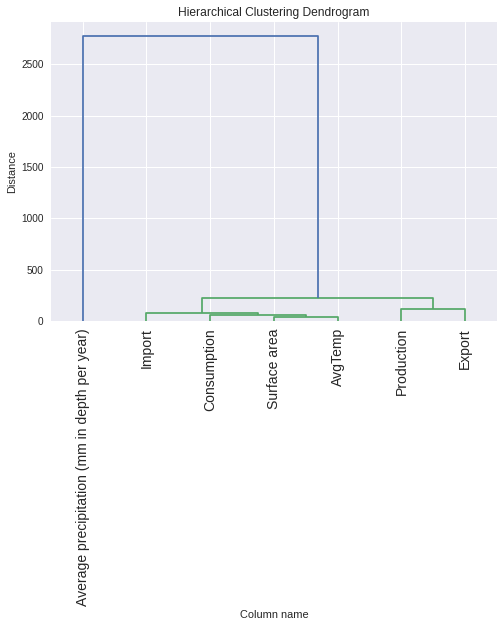

In [33]:
Z = sch.linkage(X.T, method='ward', metric='euclidean')

# Plot dendogram
# plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Column name')
plt.ylabel('Distance')
sch.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=14.,  # font size for the x axis labels
    labels=X.columns
)
plt.show()

**Now I am going to create the dendogram by dropping the continent values and settting each coutry as an index**

In [34]:
X2=raw.set_index('Country').drop(['Continent_div','Continent'],axis=1).fillna(0)
X2

,Production,Surface area,Consumption,Import,Export,Average precipitation (mm in depth per year),AvgTemp
Country,,,,,,,
Algeria,1.368268,0.001683,1.014799,0.154478,0.010718,89,22.50
Argentina,28.690896,0.004742,18.802575,0.100536,17.464005,591,14.80
Australia,46.588081,0.005692,22.585684,22.747866,81.142386,534,21.65
China,0.554461,0.000553,1.062930,1.724998,0.058531,645,07.50
France,62.619557,0.011789,36.678590,14.734377,162.820243,867,10.70
Italy,79.955220,0.012007,38.015441,6.279798,121.116792,832,13.45
South Africa,16.363538,0.002179,6.584195,0.881136,11.178412,495,17.75
United Kingdom,0.117768,0.000007,19.430241,65.946348,12.487739,1220,08.45
United States,7.710985,0.001227,10.309167,19.493409,4.233872,715,08.55


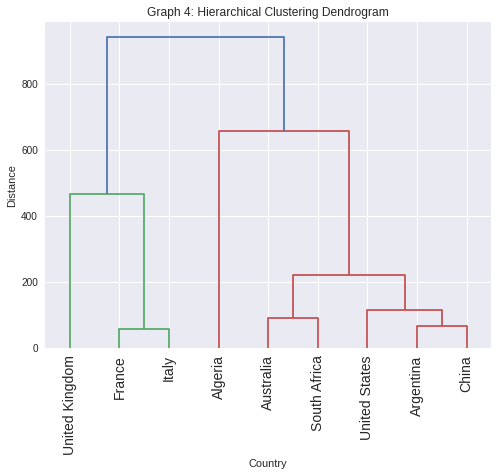

In [35]:
Z = sch.linkage(X2, method='ward', metric='euclidean')

# Plot dendogram
plt.figure(figsize=(8, 6))
plt.title('Graph 4: Hierarchical Clustering Dendrogram')
plt.xlabel('Country')
plt.ylabel('Distance')
sch.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=14.,  # font size for the x axis labels
    labels=X2.index
)
plt.show()